### Random Forest

Random Forest is an ensemble learning algorithm used for classification and regression tasks. It constructs a collection of decision trees, each trained on a random subset of the data and features. By aggregating the predictions of these trees, Random Forest enhances accuracy, generalization, and resilience to overfitting.

**Building a Failure Prediction Model:** <br>
We aim to employ the Random Forest algorithm for a supervised classification problem, specifically failure prediction labeled as 0 (no failure) and 1 (failure) in the status column.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import ParameterGrid

In [2]:
df = pd.read_csv("Group_14_Clean_Data.csv")

df = df.drop(columns=['Unnamed: 0', 'timestamp'])
label_column = 'status'
X = df.drop(label_column, axis=1)
y = df[label_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting sets
print("Train set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)
print(df.head())

Train set shape: (41611, 15) (41611,)
Test set shape: (17834, 15) (17834,)
     TP2    TP3     H1  DV_pressure  Reservoirs  Oil_temperature  \
0 -0.018  8.248  8.238       -0.024       8.248            49.45   
1 -0.018  8.248  8.238       -0.024       8.248            49.45   
2 -0.018  8.248  8.238       -0.024       8.248            49.45   
3 -0.018  8.248  8.238       -0.024       8.248            49.45   
4 -0.018  8.248  8.238       -0.024       8.248            49.45   

   Motor_current  COMP  DV_eletric  Towers  MPG  LPS  Pressure_switch  \
0           0.04   1.0         0.0     1.0  1.0  0.0              1.0   
1           0.04   1.0         0.0     1.0  1.0  0.0              1.0   
2           0.04   1.0         0.0     1.0  1.0  0.0              1.0   
3           0.04   0.0         0.0     0.0  0.0  0.0              0.0   
4           0.04   1.0         0.0     1.0  1.0  0.0              1.0   

   Oil_level  Caudal_impulses  status  
0        1.0              1.0       1

**Hyperparameters of Random Forest:** <br>
Random Forest comes with several hyperparameters that influence its performance. Here are key ones:

- Number of Trees (n_estimators): The total number of decision trees in the forest. Increasing this value generally improves performance until a certain point but can also increase computational cost.
- Maximum Depth of Trees (max_depth): The maximum depth of each decision tree. Deeper trees can capture more complex relationships but may lead to overfitting.
- Minimum Samples Split (min_samples_split): The minimum number of samples required to split an internal node. Higher values prevent small splits that might capture noise but can result in less expressive trees.
- Minimum Samples Leaf (min_samples_leaf): The minimum number of samples required to be in a leaf node. Similar to min_samples_split, it controls overfitting at the leaf level.
- Maximum Features (max_features): The maximum number of features considered for splitting a node. It introduces randomness and can enhance the diversity of trees.

Adjusting these hyperparameters allows fine-tuning the Random Forest model to achieve optimal performance for the specific failure prediction task. Cross-validation and grid search are common techniques for finding the best combination of hyperparameter values.

We will assess the model's performance and identify the optimal hyperparameters using the accuracy score from cross-validation and the out-of-bag error. We opt for randomized search due to its efficiency—training the model with grid search is time-consuming.
- **Randomized Search:**
Randomized Search is a time-efficient hyperparameter tuning technique in machine learning. It randomly samples a fixed number of hyperparameter combinations from the specified space, making it particularly useful for exploring large parameter spaces.

- **Cross Validation:**
Cross Validation is a robust evaluation method that partitions the dataset into subsets, trains the model on some, and evaluates on the rest. It provides a more reliable estimate of a model's generalization performance compared to a single train-test split.

- **Out-of-Bag Error:**
Out-of-Bag (OOB) Error is a metric used in ensemble learning, like Random Forests. It estimates a model's generalization error by evaluating its performance on data points not used in the training of a specific tree. OOB Error is particularly convenient as it doesn't require a separate validation set.

Best Hyperparameters:
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 10, 'max_depth': 20}
Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9031
           1       1.00      1.00      1.00      8803

    accuracy                           1.00     17834
   macro avg       1.00      1.00      1.00     17834
weighted avg       1.00      1.00      1.00     17834



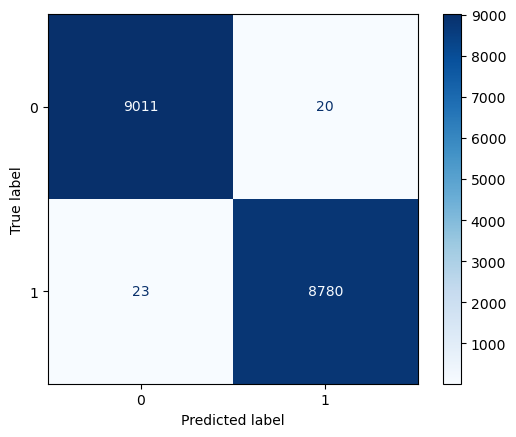

In [4]:
# Randomized Search 
model = RandomForestClassifier(random_state=42)
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [5, 10, 15]
}

# Perform Randomized Search with Cross-Validation
random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Extract cross-validated scores and hyperparameters
cv_scores = random_search.cv_results_['mean_test_score']
hyperparameters = random_search.cv_results_['params']

# Get the best parameters
best_params = random_search.best_params_

# Train the model with the best parameters
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

# Print the best hyperparameters
print('Best Hyperparameters:')
print(best_params)

# Evaluate the model on the test set
y_pred_forest = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_forest)

# Print results
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_forest))

# Display confusion matrix
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
disp_forest = ConfusionMatrixDisplay(conf_matrix_forest, display_labels=best_model.classes_)
disp_forest.plot(cmap='Blues', values_format='d')
plt.show()


Hyperparameters at Each Iteration:
Iteration 1: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 5, 'max_depth': 10} - Mean Accuracy: 99.45%
Iteration 2: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 5, 'max_depth': 10} - Mean Accuracy: 99.45%
Iteration 3: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 15, 'max_depth': 20} - Mean Accuracy: 99.62%
Iteration 4: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 15, 'max_depth': 30} - Mean Accuracy: 99.62%
Iteration 5: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 15, 'max_depth': 30} - Mean Accuracy: 99.61%
Iteration 6: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 5, 'max_depth': 30} - Mean Accuracy: 99.62%
Iteration 7: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 10, 'max_

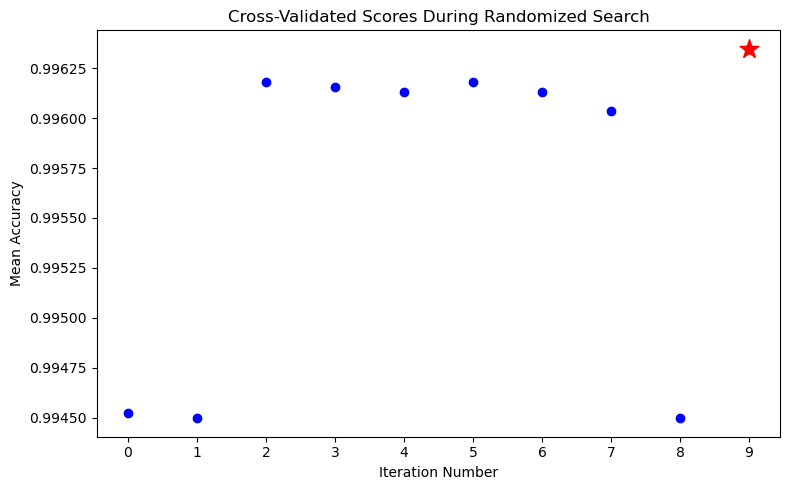

In [5]:
# Print hyperparameters outside the plot
print("Hyperparameters at Each Iteration:")
for i, params in enumerate(hyperparameters):
    print(f"Iteration {i + 1}: {params} - Mean Accuracy: {cv_scores[i]:.2%}")

# Create a plot for cross-validated scores
plt.figure(figsize=(8, 5))

# Plot the cross-validated scores
plt.scatter(range(len(cv_scores)), cv_scores, c='blue', label='Cross-validated Scores')

# Highlight the best score
best_index = random_search.best_index_
plt.scatter(best_index, cv_scores[best_index], c='red', marker='*', s=200, label='Best Score')

# Customize the plot
plt.title('Cross-Validated Scores During Randomized Search')
plt.xlabel('Iteration Number')
plt.ylabel('Mean Accuracy')

# Set x-ticks as iteration numbers
plt.xticks(range(len(cv_scores)))


plt.tight_layout()

# Show the plot
plt.show()


Best Hyperparameters:
{'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 10}
OOB Score: 99.67%
Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9031
           1       1.00      1.00      1.00      8803

    accuracy                           1.00     17834
   macro avg       1.00      1.00      1.00     17834
weighted avg       1.00      1.00      1.00     17834



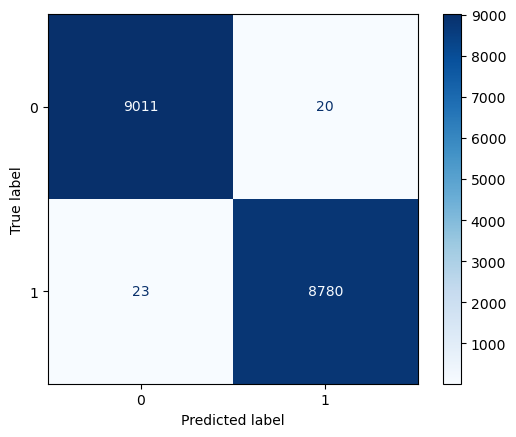

In [6]:
# Out-Of-Bag Error
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [5, 10, 15]
}

# Initialize a list to store results
results = []
oob_scores = []  # List to store OOB scores during grid search

# Perform randomized grid search with 10 iterations
for _ in range(10):
    params = {key: np.random.choice(values) for key, values in param_dist.items()}
    rf_model = RandomForestClassifier(oob_score=True, random_state=42, **params)
    rf_model.fit(X_train, y_train)
    oob_score = rf_model.oob_score_
    
    results.append({'params': params, 'oob_score': oob_score})
    oob_scores.append(oob_score)

# Find the best hyperparameters based on the highest OOB score
best_params = max(results, key=lambda x: x['oob_score'])['params']

# Print the best hyperparameters and OOB score
print('Best Hyperparameters:')
print(best_params)
print(f'OOB Score: {max(results, key=lambda x: x["oob_score"])["oob_score"]:.2%}')

# Train the final model with the best hyperparameters on the entire training set
best_model = RandomForestClassifier(oob_score=True, random_state=42, **best_params)
best_model.fit(X_train, y_train)

# Evaluate and print the results on the test set
y_pred_forest = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_forest)

print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_forest))

# Display confusion matrix
conf_matrix_forest = confusion_matrix(y_test, y_pred_forest)
disp_forest = ConfusionMatrixDisplay(conf_matrix_forest, display_labels=best_model.classes_)
disp_forest.plot(cmap='Blues', values_format='d')
plt.show()


Hyperparameters at Each Iteration:
Iteration 1: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 10} - OOB Score: 99.67%
Iteration 2: {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 5} - OOB Score: 99.46%
Iteration 3: {'n_estimators': 100, 'max_depth': 30, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 15} - OOB Score: 99.64%
Iteration 4: {'n_estimators': 50, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 10} - OOB Score: 99.64%
Iteration 5: {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 15} - OOB Score: 99.59%
Iteration 6: {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 10} - OOB Score: 99.60%
Iteration 7: {'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 10} - OOB Score: 99

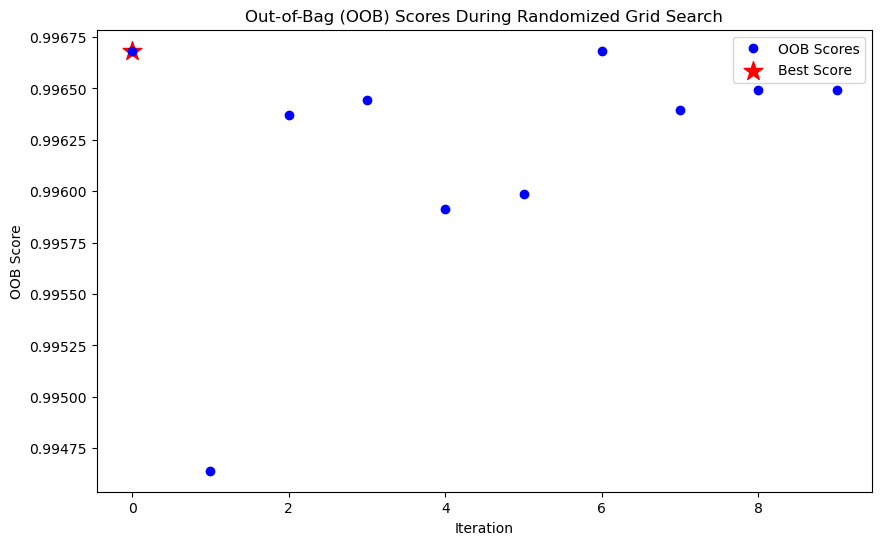

In [7]:
# Print hyperparameters at each iteration
print("Hyperparameters at Each Iteration:")
for i, params in enumerate(results):
    print(f"Iteration {i + 1}: {params['params']} - OOB Score: {params['oob_score']:.2%}")

# Create a plot for OOB scores during grid search
plt.figure(figsize=(10, 6))

# Plot the OOB scores
plt.plot(oob_scores, marker='o', linestyle=' ', color='b', label='OOB Scores')

# Highlight the best score
best_index = np.argmax(oob_scores)
plt.scatter(best_index, oob_scores[best_index], c='red', marker='*', s=200, label='Best Score')

# Customize the plot
plt.title('Out-of-Bag (OOB) Scores During Randomized Grid Search')
plt.xlabel('Iteration')
plt.ylabel('OOB Score')
plt.legend()

# Show the plot
plt.show()


- Best Hyperparameters using cross-validation: <br>
Iteration 10: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 10, 'max_depth': 20} - Mean Accuracy: 99.63%

- Best Hyperparameters using out-of-bag error: <br>
{'n_estimators': 100, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 10}
OOB Score: 99.67%

While the optimal hyperparameters differ between out-of-bag error and cross-validation, a common trend emerges: higher 'n_estimators' and 'max_depth,' along with smaller 'min_samples_split' and 'min_samples_leaf,' and larger 'max_features,' tend to result in better accuracy. Both models, each using its optimal hyperparameters, demonstrated high accuracy on test set, reaching 100%.